In [6]:
%pylab inline
import numpy as np
import tensorflow as tf
from sklearn.cross_decomposition import CCA

Populating the interactive namespace from numpy and matplotlib


CCA Basically consists of several cross-covariation matrices, so

Correlation matrix:


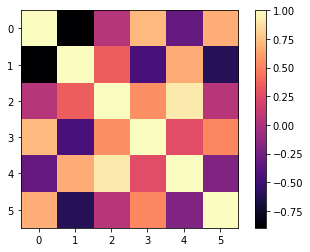

In [7]:
sample_size = 28*28

# X is 3 band normal multivariate with slight correlation between samples
X = np.random.multivariate_normal([0,2,3],[[1,-0.9,0.1],
                                           [-0.9,1,0.3],
                                           [0.1,0.3,1]],size=sample_size)

# Now set Y setting explisitly coefficents for CCA to recover and add some multivariate noise
Y = np.concatenate( 
    (
    ( X[:,0]*0.3+X[:,1]*-0.2+X[:,2]*0.4 )[:,np.newaxis],
    ( X[:,0]*-0.02+X[:,1]*1.2+X[:,2]*2.4 )[:,np.newaxis],
    ( X[:,0]*0.2+X[:,1]*-0.1+X[:,2]*0.03 )[:,np.newaxis],
    ),
    axis=1
) + np.random.normal(0,0.3,size=(sample_size,3))+1

print('Correlation matrix:')
imshow( np.corrcoef(X,Y,rowvar=False), cmap='magma' );
colorbar();

Correlation coef: 0.994229866532
x_weights =  0.033, 0.476, 0.879
y_weights =  0.025, 1.000,-0.006


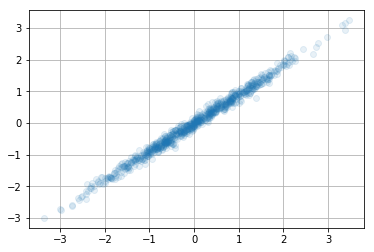

In [9]:
from sklearn.cross_decomposition import CCA

cca = CCA(n_components=1)

cca.fit(X,Y)

new_X, new_Y = cca.transform(X,Y)
print('Correlation coef:',np.corrcoef( np.ravel(new_X),np.ravel(new_Y) )[0,1] )
print('x_weights = {: >6.3f},{: >6.3f},{: >6.3f}'.format(*cca.x_weights_[:,0] ) )
print('y_weights = {: >6.3f},{: >6.3f},{: >6.3f}'.format(*cca.y_weights_[:,0] ) )
plot(new_X,new_Y,'o',alpha=0.1);
grid(True);

In [10]:
def calc_correlation( XX_cov, XY_cov, YY_cov ):
    pass



In [3]:
import importlib
import CCA
import tensorflow as tf
from CCA import model
importlib.reload(CCA)

<module 'CCA' from '/home/artef/IdeaProjects/prrnmosaic/python_scripts/CCA/__init__.py'>

In [46]:
mdl = model.CannonicalCorrelation(X.shape[0],3)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run( init)
    yy_cov = sess.run( mdl.yy_cov, feed_dict={mdl.X : X, mdl.Y : Y} )
    
    print(yy_cov)

[[ 0.44411016  0.55252427  0.14244644]
 [ 0.55252427  9.84520245 -0.25221828]
 [ 0.14244644 -0.25221828  0.1694745 ]]


In [47]:
from CCA import model2

In [43]:
xx_cov = np.cov(X,X,rowvar=False)[:3,:3]
xy_cov = np.cov(X,Y,rowvar=False)[:3,3:6]
yy_cov = np.cov(Y,Y,rowvar=False)[:3,:3]

In [27]:
xx_cov

array([[ 0.97160636, -0.89211662,  0.05194745],
       [-0.89211662,  1.01656726,  0.36546049],
       [ 0.05194745,  0.36546049,  1.07791619]])

In [44]:
xy_cov

array([[ 0.47547432, -0.96676787,  0.2755765 ],
       [-0.30284652,  2.11190488, -0.2515791 ],
       [ 0.38719402,  3.01713325,  0.02406294]])

In [29]:
yy_cov

array([[ 0.44467753,  0.55322976,  0.1426283 ],
       [ 0.55322976,  9.85777735, -0.2525404 ],
       [ 0.1426283 , -0.2525404 ,  0.16969094]])